# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sklearn
import calendar
from sklearn import cluster
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

## Data Exploration
Explore and graph trends and clusters in the data

### Load Data

In [2]:
string_data_cols = [5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22]
num_data_cols = [0,1,2,3,4,13]
goal = [23]

data_frame = pd.read_csv('trainset.csv')
df =  pd.read_csv('trainset.csv')
data = data_frame.to_numpy()
#print(data_frame)
for i in range(len(data)):
    if data[i, 23] == "Non-Fraud":
        data[i, 23] = 0.0
    else:
        data[i, 23] = 1.0
data_frame = pd.DataFrame(data)

data_numeric = data[:, 0:5]
data_goal = data[:, 23]

df['GOAL'] = list(data_goal)


### Numerical Data Exploration

Explore the relationship between the goal and the numerical datatypes

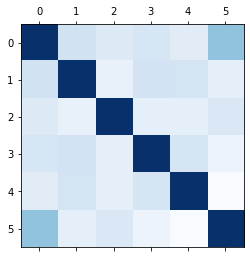

                         TRAN_AMT  ACCT_PRE_TRAN_AVAIL_BAL  CUST_AGE  \
TRAN_AMT                 1.000000                 0.095355  0.023688   
ACCT_PRE_TRAN_AVAIL_BAL  0.095355                 1.000000 -0.030382   
CUST_AGE                 0.023688                -0.030382  1.000000   
OPEN_ACCT_CT             0.059517                 0.087180 -0.013212   
WF_dvc_age               0.008768                 0.083629 -0.013567   
GOAL                     0.336169                -0.011808  0.044426   

                         OPEN_ACCT_CT  WF_dvc_age      GOAL  
TRAN_AMT                     0.059517    0.008768  0.336169  
ACCT_PRE_TRAN_AVAIL_BAL      0.087180    0.083629 -0.011808  
CUST_AGE                    -0.013212   -0.013567  0.044426  
OPEN_ACCT_CT                 1.000000    0.068204 -0.051024  
WF_dvc_age                   0.068204    1.000000 -0.116179  
GOAL                        -0.051024   -0.116179  1.000000  


In [3]:

data_frame_numeric = df[['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT', 'WF_dvc_age', 'GOAL']].copy()
plt.matshow(data_frame_numeric.corr(), cmap = 'Blues')
plt.show()
print(data_frame_numeric.corr())

Examining the correlation matrix between fraud and non fraud and the other numerical inputs there is a strong correlation between transaction amount and whether or not the transaction was fraud. None of the other fields had particularly strong correlations. The Next strongest was a -.1 between the WF_dvc_age and Fraud

### String Data Exploration

Create a correlation matrix of the strings that I initially believe will be most impactful

Index(['TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE', 'OPEN_ACCT_CT',
       'WF_dvc_age', 'PWD_UPDT_TS', 'CARR_NAME', 'RGN_NAME', 'STATE_PRVNC_TXT',
       'ALERT_TRGR_CD', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD',
       'AUTHC_SCNDRY_STAT_TXT', 'CUST_ZIP', 'CUST_STATE', 'PH_NUM_UPDT_TS',
       'CUST_SINCE_DT', 'TRAN_TS', 'TRAN_DT', 'ACTN_CD', 'ACTN_INTNL_TXT',
       'TRAN_TYPE_CD', 'ACTVY_DT', 'FRAUD_NONFRAUD', 'GOAL'],
      dtype='object')


/var/folders/hl/sjhkfxxd2hjb_h0297r3_74w0000gn/T/ipykernel_54137/2827173379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_strings_pre_conceived[x] = df[x].astype('category').cat.codes


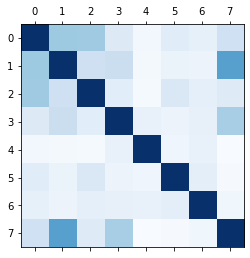

                       CARR_NAME  RGN_NAME  STATE_PRVNC_TXT  DVC_TYPE_TXT  \
CARR_NAME               1.000000  0.316613         0.308338      0.048548   
RGN_NAME                0.316613  1.000000         0.132644      0.153718   
STATE_PRVNC_TXT         0.308338  0.132644         1.000000      0.022787   
DVC_TYPE_TXT            0.048548  0.153718         0.022787      1.000000   
AUTHC_PRIM_TYPE_CD     -0.062331 -0.069421        -0.076637     -0.008129   
AUTHC_SCNDRY_STAT_TXT   0.032824 -0.023836         0.061863     -0.031897   
CUST_STATE             -0.000691 -0.033062         0.002353     -0.005450   
FRAUD_NONFRAUD          0.125268  0.519975         0.040737      0.283230   

                       AUTHC_PRIM_TYPE_CD  AUTHC_SCNDRY_STAT_TXT  CUST_STATE  \
CARR_NAME                       -0.062331               0.032824   -0.000691   
RGN_NAME                        -0.069421              -0.023836   -0.033062   
STATE_PRVNC_TXT                 -0.076637               0.061863  

In [4]:
string_data_cols = [6,7,8,9,10,11,12,14,19,20,21]
time_stamp_cols = [5,15,16,17,18, 22]
print(df.columns)
#These are the strings that I think will wind up being important
df_strings_pre_conceived = df[['CARR_NAME','RGN_NAME', 'STATE_PRVNC_TXT', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT', 'CUST_STATE', 'FRAUD_NONFRAUD']]
for x in df_strings_pre_conceived.columns:
    df_strings_pre_conceived[x] = df[x].astype('category').cat.codes

plt.matshow(df_strings_pre_conceived.corr(), cmap = 'Blues')
plt.show()
print(df_strings_pre_conceived.corr())


It appears that Carrier Name, region name and Device type have strong correlations with whether or not the transaction was considered fraud. These appear to be the strongest indicators

This next cell is to see if a true false about whether or not transaction state matching cust state will make a difference

In [5]:
df_state_match = df[['STATE_PRVNC_TXT',  'CUST_STATE', 'FRAUD_NONFRAUD']]
states = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
#df_state_match['match'] = (df['STATE_PRVNC_TXT'] == states[df['CUST_STATE']])
state_match = df_state_match.to_numpy()
print(state_match)
matches = []
for row in state_match:
    try:
        cust_state = row[1]
        trans_loc = row[0].lower()
        cust_state = states[cust_state.upper()].lower()
        matches.append(int(trans_loc == cust_state))
    except:
        matches.append(False)

df_state_match['matches'] = matches

df_state_match['matches'] = df_state_match['matches'].astype('category').cat.codes
df_state_match['FRAUD_NONFRAUD'] = df_state_match['FRAUD_NONFRAUD'].astype('category').cat.codes
#print(type(df_state_match['FRAUD_NONFRAUD']))
print(df_state_match[['matches', 'FRAUD_NONFRAUD']].corr())






[['nevada' 'NV' 'Non-Fraud']
 ['california' 'CA' 'Non-Fraud']
 ['utah' 'MD' 'Fraud']
 ...
 ['california' 'FL' 'Fraud']
 [nan 'CA' 'Fraud']
 ['texas' 'NJ' 'Non-Fraud']]
                 matches  FRAUD_NONFRAUD
matches         1.000000        0.206406
FRAUD_NONFRAUD  0.206406        1.000000


/var/folders/hl/sjhkfxxd2hjb_h0297r3_74w0000gn/T/ipykernel_54137/1080431116.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_match['matches'] = matches
/var/folders/hl/sjhkfxxd2hjb_h0297r3_74w0000gn/T/ipykernel_54137/1080431116.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_state_match['matches'] = df_state_match['matches'].astype('category').cat.codes
/var/folders/hl/sjhkfxxd2hjb_h0297r3_74w0000gn/T/ipykernel_54137/1080431116.py:19: SettingWithCopyWarning: 
A value is trying to be set

There's a strong correlation between matching the state and customer state

### Date Time Exploration

Explore the Dates and time stamps : create diffs in terms of the number of days between pswd changes and transaction date etc

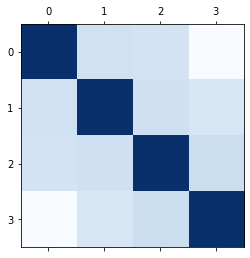

                PWD_UPDT_TS  PH_NUM_UPDT_TS  CUST_SINCE_DT      GOAL
PWD_UPDT_TS        1.000000        0.007984      -0.009193 -0.236107
PH_NUM_UPDT_TS     0.007984        1.000000       0.022571 -0.034617
CUST_SINCE_DT     -0.009193        0.022571       1.000000  0.037321
GOAL              -0.236107       -0.034617       0.037321  1.000000


In [6]:
time_stamp_cols = [5,15,16,17,18, 22]
#These are the strings that I think will wind up being important
df_date_times = df[['PWD_UPDT_TS','TRAN_TS', 'PH_NUM_UPDT_TS', 'CUST_SINCE_DT']].copy()
for x in df_date_times.columns:
    
    df_date_times[x] = pd.to_datetime(df_date_times[x], errors='coerce')

df_diffs = pd.DataFrame()
for x in df_date_times.columns:
    if x != "TRAN_TS":
        df_diffs[x] = df_date_times['TRAN_TS'] - df_date_times[x]
        df_diffs[x] = df_diffs[x].astype('timedelta64[D]')
        df_diffs[x] = df_diffs[x].fillna(value = -1)
df_diffs['GOAL'] = df['GOAL']
#print(df_diffs)

plt.matshow(df_diffs.corr(), cmap = 'Blues')
plt.show()
print(df_diffs.corr())

There is a slight negative correlation between PWD_UPDT_TS and FRAUD_NONFRAUD as well as Phone number update time.  

### Build the Train Dataset from scene trends

In [7]:


df_train = pd.DataFrame()



num_list = ['TRAN_AMT', 'CUST_AGE', 'OPEN_ACCT_CT', 'WF_dvc_age']
for x in num_list:
    df_train[x] = data_frame_numeric[x].copy()

str_list = ['CARR_NAME', 'RGN_NAME', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT']
for x in str_list:
    df_train[x] = df_strings_pre_conceived[x].copy()


df_train['MATCHES'] = df_state_match['matches']

#Add in the columns that I want
df_train['PWD_UPDT_TS'] = df_diffs['PWD_UPDT_TS'].copy()
df_train['PH_NUM_UPDT_TS'] = df_diffs['PH_NUM_UPDT_TS'].copy()

df_train['GOAL'] = df['FRAUD_NONFRAUD'].astype('category').cat.codes  

print(df_train)


       TRAN_AMT  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  CARR_NAME  RGN_NAME  \
0          5.38        47             4        2777        117        16   
1         65.19        45             5        2721         72        16   
2         54.84        36             8        1531        506         7   
3          0.01        62             3         835        447        16   
4        497.08        81             2        1095         94        13   
...         ...       ...           ...         ...        ...       ...   
13995   1937.21        55             4         142         68        16   
13996    114.38        44            10         272        447        16   
13997    493.00        54             3         517         32        16   
13998    491.64        21             3           0         -1        -1   
13999      6.02        60             6         944         74        13   

       DVC_TYPE_TXT  AUTHC_PRIM_TYPE_CD  AUTHC_SCNDRY_STAT_TXT  MATCHES  \
0           

# Build the Test Set

In [8]:
load_test = pd.read_csv('testset_for_participants.csv')
test_df = pd.DataFrame()
print(load_test.columns)
#load_test['FRAUD_NONFRAUD'] = load_test['FRAUD_NONFRAUD'].astype('category').cat.codes    
#Numerical Values
num_list = ['TRAN_AMT', 'CUST_AGE', 'OPEN_ACCT_CT', 'WF_dvc_age']
for x in num_list:
    test_df[x] = load_test[x].copy()


#String
str_list = ['CARR_NAME', 'RGN_NAME', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT']
str_df = pd.DataFrame()
for x in str_list:
    str_df[x] = load_test[x].copy()
    str_df[x] = str_df[x].astype('category').cat.codes    

for x in str_df.columns:
    test_df[x] = str_df[x]

#State Match

df_state_match_test = load_test[['STATE_PRVNC_TXT',  'CUST_STATE']]
states = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}
#df_state_match['match'] = (df['STATE_PRVNC_TXT'] == states[df['CUST_STATE']])
state_match_test = df_state_match_test.to_numpy()

matches = []
for row in state_match_test:
    try:
        cust_state = row[1]
        trans_loc = row[0].lower()
        cust_state = states[cust_state.upper()].lower()
        matches.append(int(trans_loc == cust_state))
    except:
        matches.append(False)

test_df['matches'] = matches

test_df['matches'] = test_df['matches'].astype('category').cat.codes

print(test_df)

#Date Time

df_date_times = load_test[['PWD_UPDT_TS','TRAN_TS', 'PH_NUM_UPDT_TS', 'CUST_SINCE_DT']].copy()
for x in df_date_times.columns:
    
    df_date_times[x] = pd.to_datetime(df_date_times[x], errors='coerce')

df_test_diffs = pd.DataFrame()
for x in df_date_times.columns:
    if x != "TRAN_TS":
        df_test_diffs[x] = df_date_times['TRAN_TS'] - df_date_times[x]
        df_test_diffs[x] = df_test_diffs[x].astype('timedelta64[D]')
        df_test_diffs[x] = df_test_diffs[x].fillna(value = -1)

#df_test_diffs['GOAL'] = df['GOAL']


test_df['PWD_UPDT_TS'] = df_test_diffs['PWD_UPDT_TS'].copy()
test_df['PH_NUM_UPDT_TS'] = df_test_diffs['PH_NUM_UPDT_TS'].copy()

print(test_df)


Index(['dataset_id', 'TRAN_AMT', 'ACCT_PRE_TRAN_AVAIL_BAL', 'CUST_AGE',
       'OPEN_ACCT_CT', 'WF_dvc_age', 'PWD_UPDT_TS', 'CARR_NAME', 'RGN_NAME',
       'STATE_PRVNC_TXT', 'ALERT_TRGR_CD', 'DVC_TYPE_TXT',
       'AUTHC_PRIM_TYPE_CD', 'AUTHC_SCNDRY_STAT_TXT', 'CUST_ZIP', 'CUST_STATE',
       'PH_NUM_UPDT_TS', 'CUST_SINCE_DT', 'TRAN_TS', 'TRAN_DT', 'ACTN_CD',
       'ACTN_INTNL_TXT', 'TRAN_TYPE_CD', 'ACTVY_DT'],
      dtype='object')
      TRAN_AMT  CUST_AGE  OPEN_ACCT_CT  WF_dvc_age  CARR_NAME  RGN_NAME  \
0        54.25        23             4         634         59        15   
1       110.30        56             3        1876         70         6   
2       515.95        33             5          40        240         4   
3        42.78        60             3         367        305        15   
4         0.01        61            12         518         71        15   
...        ...       ...           ...         ...        ...       ...   
5995    449.45        54            

# Train Various Models (SKLearn)
The goal here is to get a sense of what does and doesn't work with this dataset

### Try a BASIC Random Forrest
    Random Forest : 0.9672333086967233

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

rf_train, rf_val = train_test_split(df_train, test_size=0.25)
#train_set, val_set = train_test_split(rf_train, test_size = .2)

rf_model = RandomForestClassifier(n_estimators = 200,max_features ='sqrt', min_samples_leaf= 4)

rf_model = rf_model.fit(rf_train.loc[:, rf_train.columns != 'GOAL'], rf_train['GOAL'])
val_pred = rf_model.predict(rf_val.loc[:, rf_val.columns != 'GOAL'])


print(f1_score(val_pred, rf_val['GOAL']))



0.9585070478459401


### Linear Regression and Logistic Regression
    Linear Regression : 0.8629897679061641
    Logistic Regression : 0.861796643632774

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_t, val_t = rf_train, rf_val#train_test_split(df_train, test_size=0.2)

lr_model = LinearRegression()

lr_model = lr_model.fit(train_t.loc[:, train_t.columns != 'GOAL'], train_t['GOAL'])
val_pred = lr_model.predict(val_t.loc[:, val_t.columns != 'GOAL'])
val_pred = (val_pred > .5)
print("Linear Regression : " + str(f1_score(val_pred, val_t['GOAL'])))


lg_model = LogisticRegression(solver ='liblinear')

lg_model = lg_model.fit(train_t.loc[:, train_t.columns != 'GOAL'], train_t['GOAL'])
val_pred = lg_model.predict(val_t.loc[:, val_t.columns != 'GOAL'])
val_pred = (val_pred > .5)
print("Linear Regression : " + str(f1_score(val_pred, val_t['GOAL'])))




Linear Regression : 0.885188770571152
Linear Regression : 0.8897485493230174


### SKLearn's MLP model
    MLP Classifier : 0.8819609709662064

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random
random.seed(1)
train_mlp, val_mlp = rf_train, rf_val#train_test_split(df_train, test_size=0.2)

mlp = MLPClassifier((5, 100), random_state = 1, activation='relu', solver = 'adam', alpha = .0001, learning_rate_init= .001, learning_rate = 'constant', max_iter = 1000)

mlp = mlp.fit(train_mlp.loc[:, train_mlp.columns != 'GOAL'], train_mlp['GOAL'])
val_pred = mlp.predict(val_mlp.loc[:, val_mlp.columns != 'GOAL'])
print(f1_score(val_pred, val_mlp['GOAL']))


0.9049049049049049


# Train A Deep Learning Model

In [12]:
import torch.nn as nn
import time
import torch.optim as optim
import torchtext
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

## Create the Dataset

In [13]:
class input_dataset(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data_x = data.loc[:, data.columns != 'GOAL'].to_numpy()
        self.data_y = data.loc[:, data.columns == 'GOAL'].to_numpy()
        temp = []
        for x in self.data_y :
            if x == 1:
                temp.append([0,1])
            else:
                temp.append([1,0])
        self.data_y = np.array(temp)
    def __getitem__(self, i):
        return (self.data_x[i, :], self.data_y[i])

    def __len__(self):
        return self.data_x.shape[0]

In [14]:
BATCH_SIZE = 8
#print(df_train.loc[0,:])
#df_train.loc[:,] = (df_train- df_train.mean())/df_train.std()

train_ds, val = train_test_split(df_train, test_size=0.2)

train_dataset = input_dataset(train_ds)

train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle= True)

val_dataset = input_dataset(val)
val_dataloader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle= True)

## Define the MLP framework

In [15]:
#This gives the opportunity to do a single predictive output node or two and use the max of the two as probability
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        
        super().__init__()
        self.output_dim = output_dim
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 64)
        #self.fc3 = nn.Linear(64, 256)
        self.dropout = nn.Dropout(p=.2)
        self.tanh = nn.Tanh()
        self.out = nn.Linear(64, output_dim)
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.tanh(x)
        x = self.out(x)
        if self.output_dim != 1:
            x = self.softmax(x)
        return x

## Train and Eval methods

In [16]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (X, Y) in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(X.float())
        predValue, preds = torch.max(predictions, 1)
        #print(predictions)
        #print(Y)
        _, t_val = torch.max(Y.float(), 1)
        loss = criterion(predictions.float(), Y.float())
        
        acc = f1_score(t_val, preds)
        
        #print(acc)
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [17]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for (X,Y) in iterator:
            #print(X)
            predictions = model(X.float())
            predValue, preds = torch.max(predictions, 1)
            
            loss = criterion(predictions.float(), Y.float())
            
            _, t_val = torch.max(Y.float(), 1)
            acc = f1_score(t_val, preds)
            
            epoch_loss += loss.item()
            epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [18]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

## Run the training

In [19]:
exp_model = MLP(len(df_train.columns) -1,2)



exp_optimizer = optim.Adam(exp_model.parameters(), lr = .0001, weight_decay = .01)
exp_criterion = nn.BCEWithLogitsLoss()

N_EPOCHS = 100

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(exp_model, train_dataloader, exp_optimizer, exp_criterion)
    valid_loss, valid_acc = evaluate(exp_model, val_dataloader, exp_criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(exp_model.state_dict(), 'tut3-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train F1 Score: {train_acc:.2f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val F1 Score: {valid_acc:.2f}')


Epoch: 01 | Epoch Time: 0m 2s
	Train Loss: 0.652 | Train F1 Score: 0.81
	 Val. Loss: 0.621 |  Val F1 Score: 0.84
Epoch: 02 | Epoch Time: 0m 2s
	Train Loss: 0.627 | Train F1 Score: 0.82
	 Val. Loss: 0.616 |  Val F1 Score: 0.84
Epoch: 03 | Epoch Time: 0m 2s
	Train Loss: 0.623 | Train F1 Score: 0.83
	 Val. Loss: 0.614 |  Val F1 Score: 0.84
Epoch: 04 | Epoch Time: 0m 2s
	Train Loss: 0.620 | Train F1 Score: 0.83
	 Val. Loss: 0.611 |  Val F1 Score: 0.84
Epoch: 05 | Epoch Time: 0m 2s
	Train Loss: 0.616 | Train F1 Score: 0.84
	 Val. Loss: 0.608 |  Val F1 Score: 0.85
Epoch: 06 | Epoch Time: 0m 2s
	Train Loss: 0.613 | Train F1 Score: 0.83
	 Val. Loss: 0.606 |  Val F1 Score: 0.85
Epoch: 07 | Epoch Time: 0m 2s
	Train Loss: 0.610 | Train F1 Score: 0.84
	 Val. Loss: 0.603 |  Val F1 Score: 0.86
Epoch: 08 | Epoch Time: 0m 2s
	Train Loss: 0.608 | Train F1 Score: 0.85
	 Val. Loss: 0.601 |  Val F1 Score: 0.87
Epoch: 09 | Epoch Time: 0m 2s
	Train Loss: 0.607 | Train F1 Score: 0.85
	 Val. Loss: 0.600 |  Va

# Use the class probabilities for the random forest in a deep learning model

## Train a random forest for the purpose of feeding into an MLP at the bottom Layer

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

rf_data, mlp_train = train_test_split(df_train, test_size=0.5)

rf_train_mlp, rf_val_mlp = train_test_split(rf_data, test_size = .2)

rf_model_mlp_feeder = RandomForestClassifier(n_estimators = 200,max_features ='sqrt', min_samples_leaf= 4)

rf_model_mlp_feeder = rf_model_mlp_feeder.fit(rf_train_mlp.loc[:, rf_train_mlp.columns != 'GOAL'], rf_train_mlp['GOAL'])
rf_mlp_pred = rf_model_mlp_feeder.predict(rf_val_mlp.loc[:, rf_val_mlp.columns != 'GOAL'])


print(f1_score(rf_mlp_pred, rf_val_mlp['GOAL']))


0.9538934426229508


In [21]:
import pickle
pickle.dump(rf_model_mlp_feeder, open('mlp_feeder', 'wb'))

## Model Definition

In [22]:
#This gives the opportunity to do a single predictive output node or two and use the max of the two as probability
class MLP_with_RF_preds(nn.Module):
    def __init__(self, input_dim, output_dim):
        
        super().__init__()
        self.output_dim = output_dim
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 64)
        #self.fc3 = nn.Linear(64, 256)
        self.dropout = nn.Dropout(p=.2)
        self.tanh = nn.Tanh()
        self.out = nn.Linear(64 + 2, output_dim)
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x, rf):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.tanh(x)
        x = torch.cat((x, rf),1 )
        x = self.out(x)
        if self.output_dim != 1:
            x = self.softmax(x)
        return x

## Train and Eval Functions

In [23]:
def train_with_rf(model, iterator, optimizer, criterion, output_dim):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (X, R, Y) in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(X.float(), R.float())
        if output_dim > 1:
            predValue, preds = torch.max(predictions, 1)
        #print(predictions)
        #print(Y)
            _, t_val = torch.max(Y.float(), 1)
            loss = criterion(predictions.float(), Y.float())
        
            acc = f1_score(t_val, preds)
        else:
           
            loss = criterion(predictions.float(), Y.float())
            for v in temp:
                if v < .5:
                    temp.append(0)
                else:
                    temp.append(1)
            predictions = temp
            acc = f1_score(predictions, Y.float())
        #print(acc)
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [24]:
def evaluate_with_rf(model, iterator, criterion, output_dim):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for (X,R, Y) in iterator:
            #print(X)
            predictions = model(X.float(), R.float())
            if output_dim > 1:
                predValue, preds = torch.max(predictions, 1)
                
                loss = criterion(predictions.float(), Y.float())
                
                _, t_val = torch.max(Y.float(), 1)
                acc = f1_score(t_val, preds)
            else:
                loss = criterion(predictions.float(), Y.float())
                temp = []
                for v in temp:
                    if v < .5:
                        temp.append(0)
                    else:
                        temp.append(1)
                predictions = temp
                acc = f1_score(predictions, Y.float())
            epoch_loss += loss.item()
            epoch_acc += acc
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

## Build the Dataset

The two classes are for two different styles. I can represent this as a regression task and classify by .5 or I can I represent it as two classes and take the max

In [25]:
class input_dataset_with_rf_2(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data_x = data.loc[:, 'TRAN_AMT' : 'PH_NUM_UPDT_TS'].to_numpy()
        self.rf_data = data.loc[:, 'Class_RF_Pred' : 'Class_Prob'].to_numpy()
        self.data_y = data.loc[:, data.columns == 'GOAL'].to_numpy()
        temp = []
        for x in self.data_y :
            if x == 1:
                temp.append([0,1])
            else:
                temp.append([1,0])
        self.data_y = np.array(temp)
    def __getitem__(self, i):
        return (self.data_x[i, :], self.rf_data[i, :], self.data_y[i])

    def __len__(self):
        return self.data_x.shape[0]

class input_dataset_with_rf_1(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data_x = data.loc[:, 'TRAN_AMT' : 'PH_NUM_UPDT_TS'].to_numpy()
        self.rf_data = data.loc[:, 'Class_RF_Pred' : 'Class_Prob'].to_numpy()
        self.data_y = data.loc[:, data.columns == 'GOAL'].to_numpy()
        
    def __getitem__(self, i):
        return (self.data_x[i, :], self.rf_data[i, :], self.data_y[i])

    def __len__(self):
        return self.data_x.shape[0]

In [26]:

predict_class = rf_model.predict_proba(mlp_train.loc[:, val.columns != 'GOAL'])

new_df = mlp_train.copy()
temp = []
temp_val = []
for row in predict_class:
    max_val = max(row)
    temp_val.append(max_val)
    temp.append(list(row).index(max_val))
new_df['Class_RF_Pred'] = temp
new_df['Class_Prob'] = temp_val
print(new_df.columns)
rf_df, rf_val = train_test_split(new_df, test_size=0.05)

rf_train_dataset = input_dataset_with_rf_2(rf_df)
rf_train_dataloader = DataLoader(rf_train_dataset, batch_size = BATCH_SIZE, shuffle= True)

rf_val_dataset = input_dataset_with_rf_2(rf_val)
rf_val_dataloader = DataLoader(rf_val_dataset, batch_size = BATCH_SIZE, shuffle= True)


Index(['TRAN_AMT', 'CUST_AGE', 'OPEN_ACCT_CT', 'WF_dvc_age', 'CARR_NAME',
       'RGN_NAME', 'DVC_TYPE_TXT', 'AUTHC_PRIM_TYPE_CD',
       'AUTHC_SCNDRY_STAT_TXT', 'MATCHES', 'PWD_UPDT_TS', 'PH_NUM_UPDT_TS',
       'GOAL', 'Class_RF_Pred', 'Class_Prob'],
      dtype='object')


## Run the training

In [27]:

new_model = MLP_with_RF_preds(len(new_df.columns) -3,2)

new_optimizer = optim.Adam(new_model.parameters(), lr = .005)
new_criterion = nn.BCEWithLogitsLoss()

N_EPOCHS = 15

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train_with_rf(new_model, rf_train_dataloader, new_optimizer, new_criterion,2)
    valid_loss, valid_acc = evaluate_with_rf(new_model, rf_val_dataloader, new_criterion, 2)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(new_model.state_dict(), 'best-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train F1 Score: {train_acc:.5f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val F1 Score: {valid_acc:.5f}')


Epoch: 01 | Epoch Time: 0m 1s
	Train Loss: 0.580 | Train F1 Score: 0.90563
	 Val. Loss: 0.536 |  Val F1 Score: 0.97520
Epoch: 02 | Epoch Time: 0m 1s
	Train Loss: 0.532 | Train F1 Score: 0.96818
	 Val. Loss: 0.528 |  Val F1 Score: 0.97062
Epoch: 03 | Epoch Time: 0m 1s
	Train Loss: 0.526 | Train F1 Score: 0.96933
	 Val. Loss: 0.526 |  Val F1 Score: 0.97235
Epoch: 04 | Epoch Time: 0m 1s
	Train Loss: 0.524 | Train F1 Score: 0.97118
	 Val. Loss: 0.524 |  Val F1 Score: 0.97333
Epoch: 05 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96902
	 Val. Loss: 0.524 |  Val F1 Score: 0.97523
Epoch: 06 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96965
	 Val. Loss: 0.524 |  Val F1 Score: 0.97240
Epoch: 07 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96978
	 Val. Loss: 0.523 |  Val F1 Score: 0.97152
Epoch: 08 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96985
	 Val. Loss: 0.524 |  Val F1 Score: 0.97161
Epoch: 09 | Epoch Time: 0m 1s
	Train Loss: 0.523

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1514: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


Epoch: 11 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96791
	 Val. Loss: 0.523 |  Val F1 Score: 0.97119
Epoch: 12 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96865
	 Val. Loss: 0.523 |  Val F1 Score: 0.97285
Epoch: 13 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96804
	 Val. Loss: 0.524 |  Val F1 Score: 0.97231
Epoch: 14 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96972
	 Val. Loss: 0.523 |  Val F1 Score: 0.97164
Epoch: 15 | Epoch Time: 0m 1s
	Train Loss: 0.523 | Train F1 Score: 0.96945
	 Val. Loss: 0.523 |  Val F1 Score: 0.97401


# Conclusion

The random forest model showed the most promise out of all of the models that I experimented with. Where most experienced an F1 of .85-.88 it had around .95-.96

I was further able to push the limit of this score by implementing the output of the random forest into a neural network, specifically an MLP.

I tried doing this in two ways

1.) I tried adding the output of the Random Forest to the input layer, 

 The Problem: The model never actually learned just how relevant these new features were compared to other features

2.) I injected the new features into the output layer of the neural network

In other words, I took the outputs of the RF and joined it with the output from the hidden layers. This was then run through a linear layer and the model was able to associate the importance of these particular features to boost F1 to about .975